In [23]:
from langgraph.graph import StateGraph,START,END
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

from langchain_groq import ChatGroq
import os 
from dotenv import load_dotenv
load_dotenv()
llm=ChatGroq(model="llama3-8b-8192")  
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000295C57B4450>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000295C57612D0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [24]:
class evaluate_state(TypedDict):
    topic:str
    outline:str
    content:str
    score:int

graph=StateGraph(evaluate_state)

In [25]:
## creating nodes

def generate_outline(state:evaluate_state)->evaluate_state:
    topic=state["topic"]

    prompt=f"Generate a detailed outline for thr topic-{topic}"

    outline=llm.invoke(prompt).content

    state["outline"]=outline

    return state

In [26]:
def generate_blog(state:evaluate_state)->evaluate_state:
    outline=state["outline"]
    topic=state["topic"]

    prompt=f"Generate a blog for the topic - {topic} given outline is - {outline}"

    content=llm.invoke(prompt).content

    state["content"]=content

    return state

In [27]:
def evaluate_blog(state:evaluate_state)->evaluate_state:
    outline=state["outline"]
    topic=state["topic"]
    content=state["content"]

    prompt=f""" 
            You will be given  topic, outline and the blog.
            your task is to analyse the content of the blog as per the topic and the outline and generate a score
            that score should be between 1 to 10 based on the accuracy and the informational value and the relevancy
            topic is {topic}
            outline is {outline}
            content is {content}

            ** Just generate the number do not generate anything else**
            """
    
    score=llm.invoke(prompt).content

    state["score"]=score

    return state

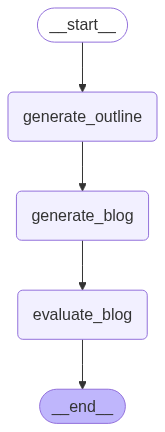

In [28]:
## Adding the nodes and the edges

graph.add_node("generate_outline",generate_outline)
graph.add_node("generate_blog",generate_blog)
graph.add_node("evaluate_blog",evaluate_blog)

## Add the edges

graph.add_edge(START,"generate_outline")
graph.add_edge("generate_outline","generate_blog")
graph.add_edge("generate_blog","evaluate_blog")
graph.add_edge("evaluate_blog",END)

## compiling the graph
workflow=graph.compile()
workflow


In [29]:
initial_state={"topic":"Indian Economy"}
final_state=workflow.invoke(initial_state)
final_state

{'topic': 'Indian Economy',
 'outline': 'Here is a detailed outline for the topic "Indian Economy":\n\n**I. Introduction**\n\n* Definition of Indian economy\n* Importance of Indian economy in the global context\n* Brief overview of the Indian economy\'s structure and features\n\n**II. Historical Background**\n\n* Ancient Indian economy: trade, commerce, and industries\n* Medieval period: Mughal Empire and the decline of Indian economy\n* British colonial rule: exploitation and economic underdevelopment\n* Post-independence era: nationalization, planning, and economic growth\n\n**III. Economic Structure**\n\n* Overview of the Indian economy\'s structure\n* Primary sector: agriculture, forestry, and fishing\n* Secondary sector: manufacturing, mining, and construction\n* Tertiary sector: services, finance, and commerce\n* Quaternary sector: knowledge-based industries and services\n\n**IV. Macroeconomic Indicators**\n\n* Gross Domestic Product (GDP): definition, calculation, and analysis\n

In [30]:
final_state["outline"]

'Here is a detailed outline for the topic "Indian Economy":\n\n**I. Introduction**\n\n* Definition of Indian economy\n* Importance of Indian economy in the global context\n* Brief overview of the Indian economy\'s structure and features\n\n**II. Historical Background**\n\n* Ancient Indian economy: trade, commerce, and industries\n* Medieval period: Mughal Empire and the decline of Indian economy\n* British colonial rule: exploitation and economic underdevelopment\n* Post-independence era: nationalization, planning, and economic growth\n\n**III. Economic Structure**\n\n* Overview of the Indian economy\'s structure\n* Primary sector: agriculture, forestry, and fishing\n* Secondary sector: manufacturing, mining, and construction\n* Tertiary sector: services, finance, and commerce\n* Quaternary sector: knowledge-based industries and services\n\n**IV. Macroeconomic Indicators**\n\n* Gross Domestic Product (GDP): definition, calculation, and analysis\n* National Income: definition, calculati